In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [199]:
df = pd.read_csv('C:/Users/modye/Downloads/RELIANCE.csv')
df

,Date,Symbol,Series,Open,High,Low,Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03/01/2000,RELIANCE,EQ,237.50,251.70,237.50,251.70,4456424,1.111320e+14,NaN,NaN,NaN
1,04/01/2000,RELIANCE,EQ,258.40,271.85,251.30,271.85,9487878,2.500220e+14,NaN,NaN,NaN
2,05/01/2000,RELIANCE,EQ,256.65,287.90,256.65,282.50,26833684,7.373700e+14,NaN,NaN,NaN
3,06/01/2000,RELIANCE,EQ,289.00,300.70,289.00,294.35,15682286,4.633250e+14,NaN,NaN,NaN
4,07/01/2000,RELIANCE,EQ,295.00,317.90,293.00,314.55,19870977,6.138390e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5070,22/05/2020,RELIANCE,EQ,1451.80,1458.00,1426.50,1431.55,17458503,2.518060e+15,388907.0,4083814.0,0.2339
5071,26/05/2020,RELIANCE,EQ,1448.15,1449.70,1416.30,1424.05,15330793,2.190320e+15,341795.0,7437964.0,0.4852
5072,27/05/2020,RELIANCE,EQ,1431.00,1454.00,1412.00,1445.55,16460764,2.354220e+15,348477.0,6524302.0,0.3964
5073,28/05/2020,RELIANCE,EQ,1455.00,1479.75,1449.00,1472.25,18519252,2.717700e+15,405603.0,8377100.0,0.4523


In [200]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [201]:
df = pd.read_csv('C:/Users/modye/Downloads/RELIANCE.csv',na_values=['RELIANCE','EQ'])
df

,Date,Symbol,Series,Open,High,Low,Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03/01/2000,NaN,NaN,237.50,251.70,237.50,251.70,4456424,1.111320e+14,NaN,NaN,NaN
1,04/01/2000,NaN,NaN,258.40,271.85,251.30,271.85,9487878,2.500220e+14,NaN,NaN,NaN
2,05/01/2000,NaN,NaN,256.65,287.90,256.65,282.50,26833684,7.373700e+14,NaN,NaN,NaN
3,06/01/2000,NaN,NaN,289.00,300.70,289.00,294.35,15682286,4.633250e+14,NaN,NaN,NaN
4,07/01/2000,NaN,NaN,295.00,317.90,293.00,314.55,19870977,6.138390e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5070,22/05/2020,NaN,NaN,1451.80,1458.00,1426.50,1431.55,17458503,2.518060e+15,388907.0,4083814.0,0.2339
5071,26/05/2020,NaN,NaN,1448.15,1449.70,1416.30,1424.05,15330793,2.190320e+15,341795.0,7437964.0,0.4852
5072,27/05/2020,NaN,NaN,1431.00,1454.00,1412.00,1445.55,16460764,2.354220e+15,348477.0,6524302.0,0.3964
5073,28/05/2020,NaN,NaN,1455.00,1479.75,1449.00,1472.25,18519252,2.717700e+15,405603.0,8377100.0,0.4523


In [202]:
df.describe()

,Symbol,Series,Open,High,Low,Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,0.0,0.0,5075.000000,5075.000000,5075.000000,5075.000000,5.075000e+03,5.075000e+03,2.225000e+03,4.561000e+03,4561.000000
mean,NaN,NaN,967.397271,981.117429,952.283685,966.214729,5.130275e+06,4.939703e+14,1.220797e+05,2.163814e+06,0.441044
std,NaN,NaN,542.662284,552.104362,530.774975,541.236031,4.155610e+06,5.184849e+14,9.573483e+04,1.776589e+06,0.144237
min,NaN,NaN,205.500000,219.500000,197.150000,203.200000,5.282000e+04,4.295540e+12,2.991000e+03,2.909700e+04,0.076300
25%,NaN,NaN,554.000000,561.875000,545.000000,551.225000,2.778337e+06,2.139270e+14,6.981400e+04,1.161475e+06,0.329900
50%,NaN,NaN,920.100000,931.000000,909.300000,920.000000,4.085150e+06,3.514800e+14,9.556100e+04,1.743995e+06,0.457500
75%,NaN,NaN,1142.775000,1160.925000,1118.200000,1139.325000,6.215759e+06,6.087885e+14,1.417590e+05,2.587743e+06,0.548300
max,NaN,NaN,3298.000000,3298.000000,3141.300000,3220.850000,6.523089e+07,8.835030e+15,1.194059e+06,3.495888e+07,0.978300


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5075 non-null   object 
 1   Symbol              0 non-null      float64
 2   Series              0 non-null      float64
 3   Open                5075 non-null   float64
 4   High                5075 non-null   float64
 5   Low                 5075 non-null   float64
 6   Close               5075 non-null   float64
 7   Volume              5075 non-null   int64  
 8   Turnover            5075 non-null   float64
 9   Trades              2225 non-null   float64
 10  Deliverable Volume  4561 non-null   float64
 11  %Deliverble         4561 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 475.9+ KB


In [204]:
df.dtypes

Date                   object
Symbol                float64
Series                float64
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [205]:
df.isnull().sum()/len(df)

Date                  0.000000
Symbol                1.000000
Series                1.000000
Open                  0.000000
High                  0.000000
Low                   0.000000
Close                 0.000000
Volume                0.000000
Turnover              0.000000
Trades                0.561576
Deliverable Volume    0.101281
%Deliverble           0.101281
dtype: float64

In [206]:
df=df.drop(columns=['Symbol','Series','Trades'])
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,NaN,NaN
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,NaN,NaN
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,NaN,NaN
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,NaN,NaN
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,NaN,NaN


In [207]:
df=df.fillna({'Deliverable Volume':0})
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,0.0,NaN
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,0.0,NaN
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,0.0,NaN
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,0.0,NaN
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,0.0,NaN


In [208]:
# col_median=df.median(axis=0)
# col_median
col_means=df.mean(axis=0)['%Deliverble']
col_means

0.44104422275816735

In [209]:
df=df.fillna({'%Deliverble':col_means})
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,0.0,0.441044
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,0.0,0.441044
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,0.0,0.441044
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,0.0,0.441044
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,0.0,0.441044


In [210]:
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [211]:
df

,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,0.0,0.441044
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,0.0,0.441044
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,0.0,0.441044
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,0.0,0.441044
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,0.0,0.441044
...,...,...,...,...,...,...,...,...,...
5070,22/05/2020,1451.80,1458.00,1426.50,1431.55,17458503,2.518060e+15,4083814.0,0.233900
5071,26/05/2020,1448.15,1449.70,1416.30,1424.05,15330793,2.190320e+15,7437964.0,0.485200
5072,27/05/2020,1431.00,1454.00,1412.00,1445.55,16460764,2.354220e+15,6524302.0,0.396400
5073,28/05/2020,1455.00,1479.75,1449.00,1472.25,18519252,2.717700e+15,8377100.0,0.452300


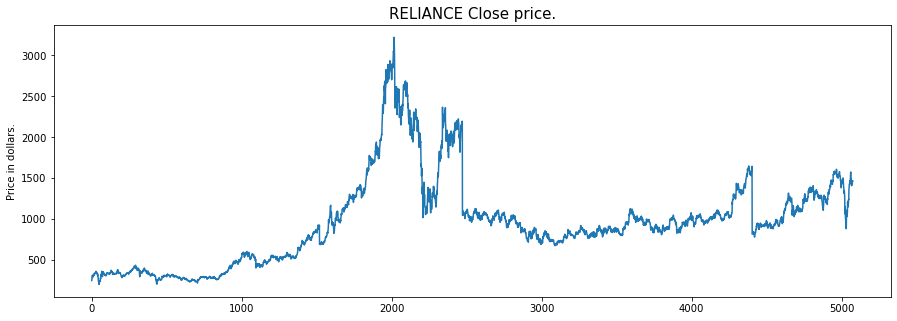

In [212]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('RELIANCE Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [213]:
df.head()


,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,0.0,0.441044
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,0.0,0.441044
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,0.0,0.441044
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,0.0,0.441044
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,0.0,0.441044


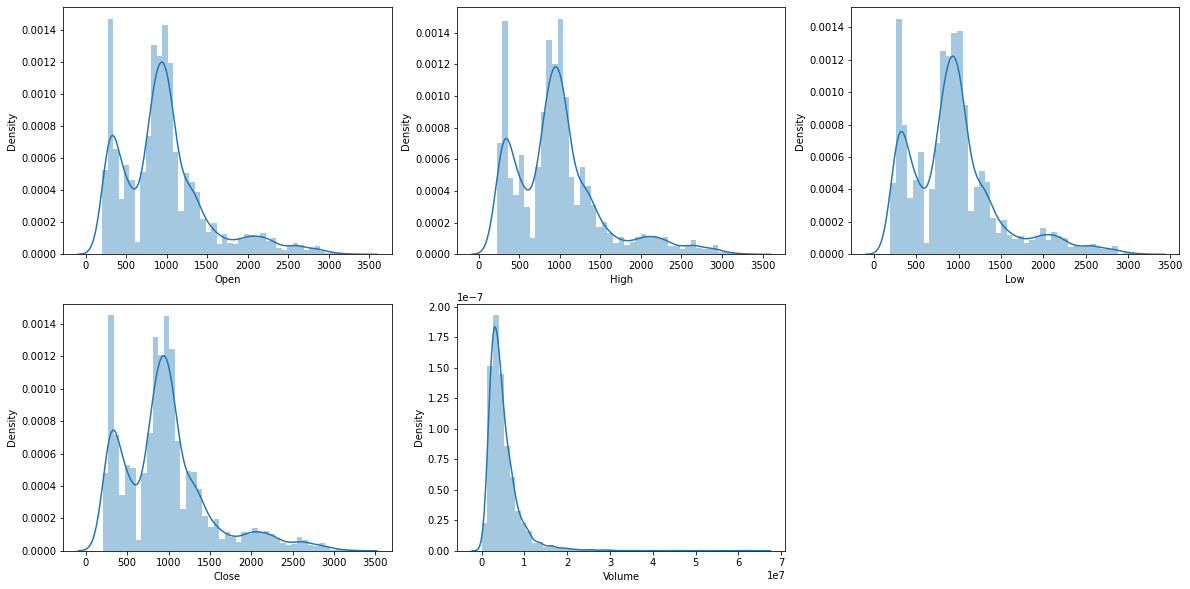

In [214]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


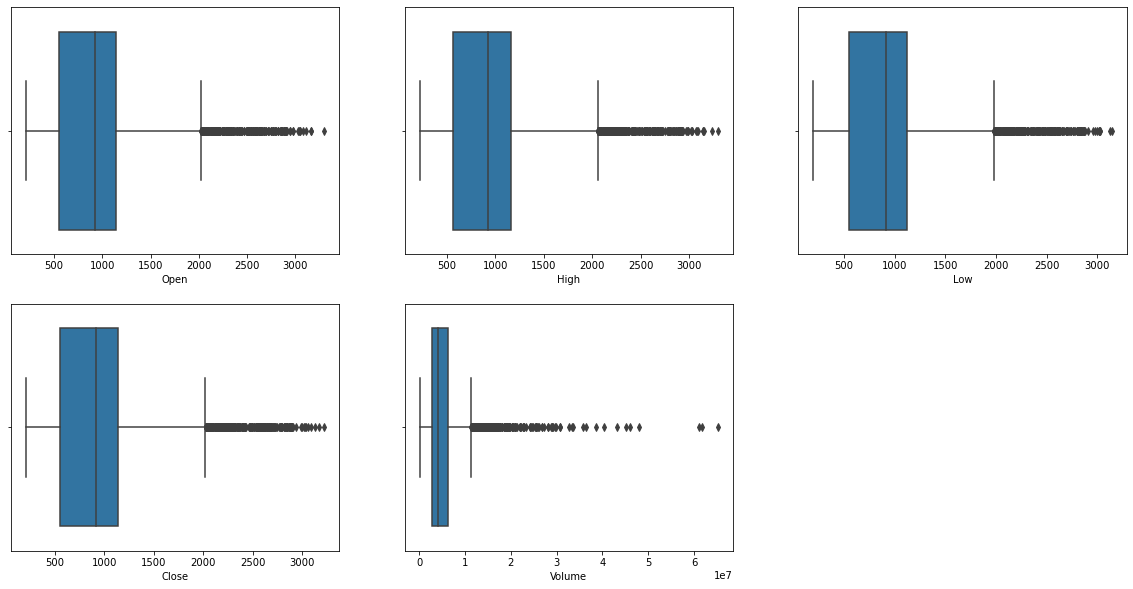

In [215]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


In [216]:
splitted = df['Date'].str.split('/', expand=True)
df['day'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,0.0,0.441044,3,1,2000
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,0.0,0.441044,4,1,2000
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,0.0,0.441044,5,1,2000
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,0.0,0.441044,6,1,2000
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,0.0,0.441044,7,1,2000


In [217]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df


,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year,is_quarter_end
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,0.0,0.441044,3,1,2000,0
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,0.0,0.441044,4,1,2000,0
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,0.0,0.441044,5,1,2000,0
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,0.0,0.441044,6,1,2000,0
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,0.0,0.441044,7,1,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,22/05/2020,1451.80,1458.00,1426.50,1431.55,17458503,2.518060e+15,4083814.0,0.233900,22,5,2020,0
5071,26/05/2020,1448.15,1449.70,1416.30,1424.05,15330793,2.190320e+15,7437964.0,0.485200,26,5,2020,0
5072,27/05/2020,1431.00,1454.00,1412.00,1445.55,16460764,2.354220e+15,6524302.0,0.396400,27,5,2020,0
5073,28/05/2020,1455.00,1479.75,1449.00,1472.25,18519252,2.717700e+15,8377100.0,0.452300,28,5,2020,0


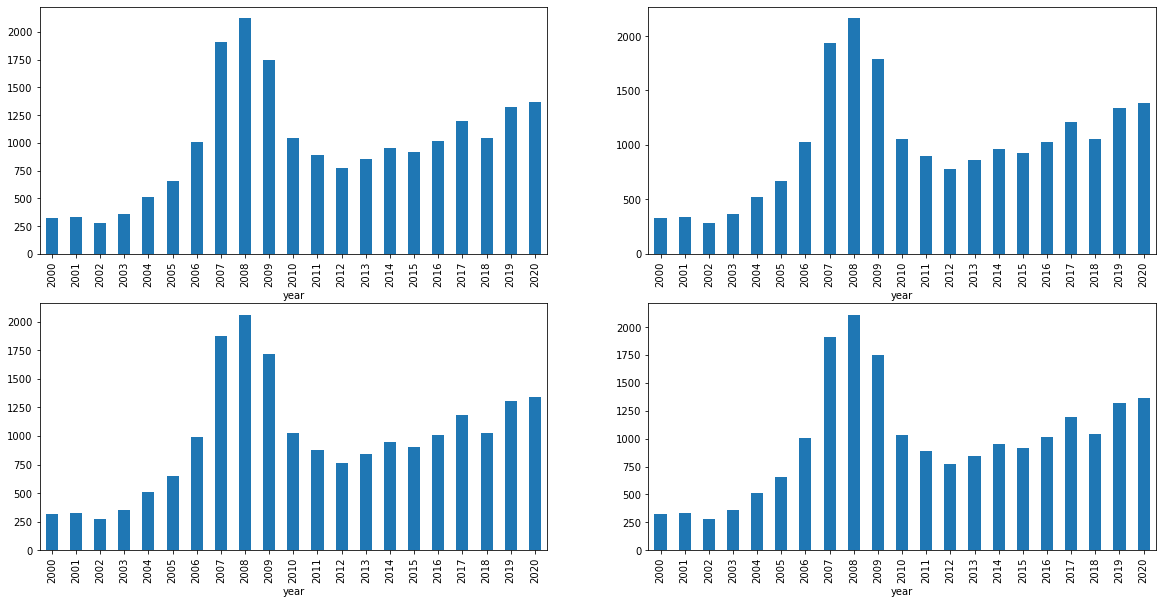

In [218]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()




In [219]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year
is_quarter_end,,,,,,,,,,,
0,975.016047,988.900443,959.524122,973.568276,5.145789e+06,5.010150e+14,1.919956e+06,0.441050,15.843224,5.934455,2009.718925
1,952.110071,965.500681,937.755628,951.459716,5.099148e+06,4.798349e+14,1.994233e+06,0.441033,15.719194,7.446682,2009.578791


In [220]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df

,Date,Open,High,Low,Close,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year,is_quarter_end,open-close,low-high,target
0,03/01/2000,237.50,251.70,237.50,251.70,4456424,1.111320e+14,0.0,0.441044,3,1,2000,0,-14.20,-14.20,1
1,04/01/2000,258.40,271.85,251.30,271.85,9487878,2.500220e+14,0.0,0.441044,4,1,2000,0,-13.45,-20.55,1
2,05/01/2000,256.65,287.90,256.65,282.50,26833684,7.373700e+14,0.0,0.441044,5,1,2000,0,-25.85,-31.25,1
3,06/01/2000,289.00,300.70,289.00,294.35,15682286,4.633250e+14,0.0,0.441044,6,1,2000,0,-5.35,-11.70,1
4,07/01/2000,295.00,317.90,293.00,314.55,19870977,6.138390e+14,0.0,0.441044,7,1,2000,0,-19.55,-24.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,22/05/2020,1451.80,1458.00,1426.50,1431.55,17458503,2.518060e+15,4083814.0,0.233900,22,5,2020,0,20.25,-31.50,0
5071,26/05/2020,1448.15,1449.70,1416.30,1424.05,15330793,2.190320e+15,7437964.0,0.485200,26,5,2020,0,24.10,-33.40,1
5072,27/05/2020,1431.00,1454.00,1412.00,1445.55,16460764,2.354220e+15,6524302.0,0.396400,27,5,2020,0,-14.55,-42.00,1
5073,28/05/2020,1455.00,1479.75,1449.00,1472.25,18519252,2.717700e+15,8377100.0,0.452300,28,5,2020,0,-17.25,-30.75,0


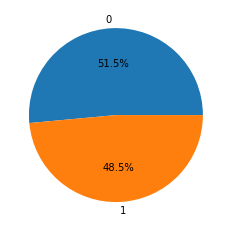

In [221]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


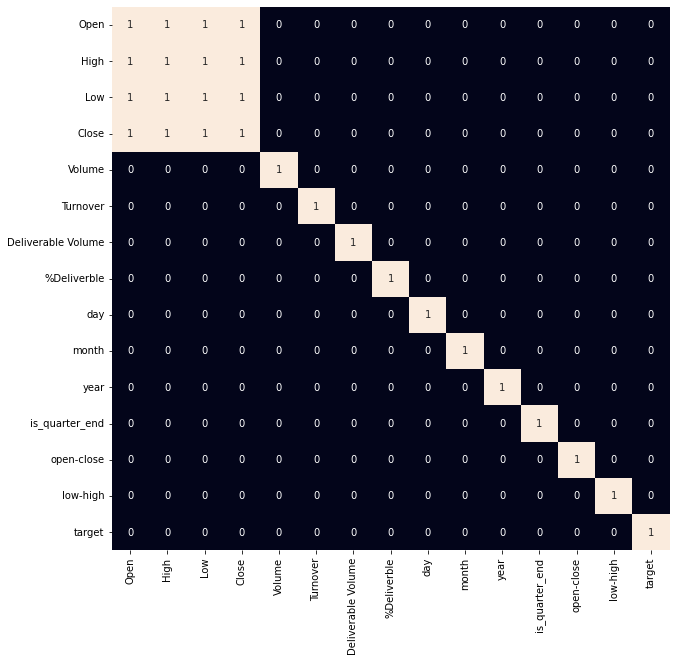

In [222]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [223]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)


X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=.1)
print(' X_train', X_train.shape,'\n','X_valid',X_valid.shape)


 X_train (4567, 3) 
 X_valid (508, 3)


In [224]:
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# models = [LogisticRegression(), SVC(
# kernel='poly', probability=True), XGBClassifier()]

# for i in range(3):
#     models[i].fit(X_train, Y_train)

#     print(f'{models[i]} : ')
#     print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
#     print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
#     print()



In [225]:
models =SVC(kernel='linear', probability=True)
models.fit(X_train, Y_train)
print(f'{models} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models.predict_proba(X_valid)[:,1]))


SVC(kernel='linear', probability=True) : 
Training Accuracy :  0.4992007803332078
Validation Accuracy :  0.4922712811360286


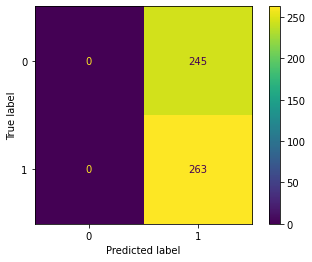

In [226]:
metrics.plot_confusion_matrix(models, X_valid, Y_valid)
plt.show()